In [79]:
# ייבוא ספריות
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from faker import Faker # ספרייה להרצת שמות רנדומליים
from scipy import stats 

In [80]:
# בניית קובץ נתונים רנדומלי

df = pd.DataFrame(np.random.randint(45,100,size=(10, 50))) 

df


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,59,91,81,67,49,72,54,92,70,65,...,49,76,66,78,52,69,93,67,64,88
1,92,50,95,59,95,58,69,60,63,84,...,54,47,83,57,90,86,59,70,45,97
2,62,90,89,61,83,84,60,97,97,66,...,53,86,68,48,74,48,95,93,96,96
3,91,78,47,63,99,51,58,99,84,96,...,91,75,69,89,96,72,50,91,96,67
4,68,57,64,58,76,81,94,52,80,76,...,46,56,82,47,82,49,83,63,63,82
5,70,64,55,63,57,47,71,98,56,65,...,52,60,63,94,95,81,92,74,99,48
6,77,52,46,65,87,52,81,88,67,83,...,57,82,68,93,84,59,62,67,87,90
7,61,45,72,60,94,63,95,82,63,83,...,51,94,59,53,64,50,58,49,77,60
8,51,92,60,92,98,78,80,63,86,58,...,72,60,56,69,93,68,76,88,58,99
9,76,74,65,46,78,66,68,84,98,79,...,62,64,79,46,47,95,69,62,79,80


In [81]:
# הוספת שמות רנדומליים

df_length = df.shape[1] # מספר הטורים 

fake = Faker()

dict_of_names = {}
for i in range(df_length):
  dict_of_names[i] = fake.name()


df = df.rename(dict_of_names,axis=1)

df

,Amy Roberts,Alexander Williamson,Karen Duran,Kimberly Garcia,Daniel Hays,Stephanie Yoder,Raymond Wang,Cole Hudson DDS,Patricia Kline,Michael Andrews,...,Benjamin Harrison,Diane Evans,Ryan Franco,Brent Roach,Charles Chase,Amy Henry,Zachary Arnold,Edward Brown,Brian Combs,Denise Mitchell
0,59,91,81,67,49,72,54,92,70,65,...,49,76,66,78,52,69,93,67,64,88
1,92,50,95,59,95,58,69,60,63,84,...,54,47,83,57,90,86,59,70,45,97
2,62,90,89,61,83,84,60,97,97,66,...,53,86,68,48,74,48,95,93,96,96
3,91,78,47,63,99,51,58,99,84,96,...,91,75,69,89,96,72,50,91,96,67
4,68,57,64,58,76,81,94,52,80,76,...,46,56,82,47,82,49,83,63,63,82
5,70,64,55,63,57,47,71,98,56,65,...,52,60,63,94,95,81,92,74,99,48
6,77,52,46,65,87,52,81,88,67,83,...,57,82,68,93,84,59,62,67,87,90
7,61,45,72,60,94,63,95,82,63,83,...,51,94,59,53,64,50,58,49,77,60
8,51,92,60,92,98,78,80,63,86,58,...,72,60,56,69,93,68,76,88,58,99
9,76,74,65,46,78,66,68,84,98,79,...,62,64,79,46,47,95,69,62,79,80


In [82]:
# הצגת ממוצע הציונים 
df_desc = df.mean().sort_values(ascending=False)

df_desc.head(5)

John Goodwin       85.4
Daniel Hays        81.6
Cole Hudson DDS    81.5
Denise Mitchell    80.7
Kelly Park         78.0
dtype: float64

<AxesSubplot:>

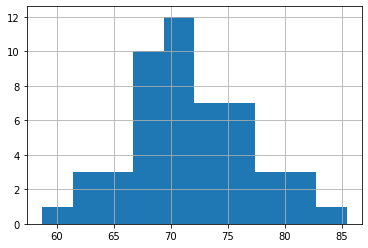

In [83]:
df.mean().hist()  # התפלגות ממוצע הציונים

In [84]:
# H0 = Column is normally distributed
# H1 = Column is not normally distributed

print(stats.normaltest(df.mean()))

NormaltestResult(statistic=0.6923171142930966, pvalue=0.7074003148384913)


<AxesSubplot:>

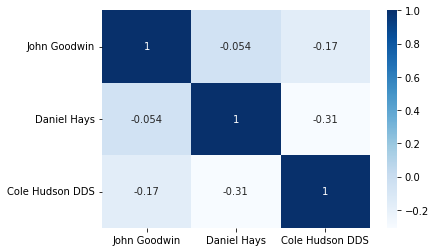

In [86]:
# טבלת קורלציה
imx = df[["John Goodwin","Daniel Hays","Cole Hudson DDS"]].corr()

sns.heatmap(imx, annot=True, cmap='Blues') 

<AxesSubplot:>

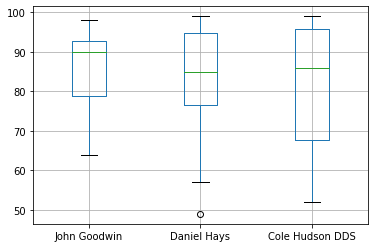

In [87]:
df.boxplot(["John Goodwin","Daniel Hays","Cole Hudson DDS"]) #מציאת מבחנים חריגים

In [88]:
df_T = df.T # שחלוף קובץ הנתונים

df_T.head(5)

,0,1,2,3,4,5,6,7,8,9
Amy Roberts,59,92,62,91,68,70,77,61,51,76
Alexander Williamson,91,50,90,78,57,64,52,45,92,74
Karen Duran,81,95,89,47,64,55,46,72,60,65
Kimberly Garcia,67,59,61,63,58,63,65,60,92,46
Daniel Hays,49,95,83,99,76,57,87,94,98,78


In [89]:
df_d = df_T.describe() # תיאור סטטיסטי 10 המבחנים

df_d

,0,1,2,3,4,5,6,7,8,9
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,71.700000,72.440000,72.540000,73.340000,68.640000,70.900000,72.940000,69.580000,74.860000,70.220000
std,14.155478,16.340959,15.940207,17.693086,14.734051,14.932843,17.070574,17.090503,16.444104,13.713229
min,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,46.000000
25%,63.000000,57.250000,61.000000,57.000000,56.250000,59.250000,57.500000,53.250000,58.500000,62.000000
50%,72.000000,72.000000,70.000000,73.000000,70.500000,69.000000,74.000000,65.500000,77.000000,69.000000
75%,84.000000,88.000000,86.000000,90.500000,80.750000,81.750000,87.750000,85.250000,90.000000,79.000000
max,93.000000,97.000000,97.000000,99.000000,94.000000,99.000000,99.000000,97.000000,99.000000,98.000000


In [90]:
# מציאת טופ 3 מבחנים
df_dT = df_d.T 

df_dT = df_dT["mean"].sort_values(ascending=False) 

df_dT.head(3)



8    74.86
3    73.34
6    72.94
Name: mean, dtype: float64